In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('df_audio_features_5000')
df.info()                                                                                                                                                                       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   name                                                                                                                                                                               5235 non-null   object 
 1   artist                                                                                                                                                                             5235 non-null   object 
 2   danceability                                            

In [16]:
df.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [75]:
def music_clean_data_norm(file):
    import pandas as pd
    import matplotlib.pyplot as plt
    df = pd.read_csv(file)
    df.columns = df.columns.str.strip() #if there are spaces in column names, they will be removes
    df['name_art_id']=df['name']+df['artist']+df['id'] #adding new column
    df.set_index('name_art_id', inplace=True) #new column will be an index
    df.drop(columns=['name','artist','type', 'id', 'html', 'key', 'mode', 'duration_ms','time_signature'], inplace=True) #removing columns that are not necessary for clustering
    df.dropna(axis=0, how='any', inplace=True) #removing raws with any null value
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))] #table without ourliers if any exists
    
    from sklearn.preprocessing import MinMaxScaler
    df_norm = MinMaxScaler().fit_transform(not_outliers) #normalization of the values in the tables
    table_normalized=pd.DataFrame(df_norm, columns=df.columns, index=df.index)
    
    return table_normalized


In [76]:
clean_norm5000=music_clean_data_norm('df_audio_features_5000') # no outliers, no raws with only null values
clean_norm1000=music_clean_data_norm('df_audio_features_1000') # no outliers, no raws with only null values

In [77]:

clean_norm5000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5235 entries, Se Eu Quiser Falar Com Deus                                                                                                                                                      Gilberto Gil                                    1n7JnwviZ7zf0LR1tcGFq7  to Ravel: Boléro, M. 81                                                                                                                                                           Maurice Ravel                                   7E1ErYYCn0lYjHODZ1qGuB 
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   loudness          4880 non-null   float64
 3   speechiness       4798 non-null   float64
 4   acousticness      5235 non-null   float64
 5   instrumentalness  5235 non-null   float64
 6   liveness          4940 non-nu

In [130]:
clean_norm5000.dropna(axis=0, how='any', inplace=True)

In [37]:
clean_norm5000.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name_art_id,,,,,,,,,
Saudade De Bahia Antônio Carlos Jobim 5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.3990,0.357966,0.184043,0.217871,0.000002,0.236203,0.703553,0.555779
Mulher Eu Sei Chico César 3mXqOdlLE1k67WsAxryPFs,0.729059,0.0502,0.106945,0.250532,0.882530,0.000041,0.852097,0.531980,0.432506
Rosa Morena Kurt Elling 7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.1190,0.029284,0.202128,0.919679,0.000348,0.229581,0.408122,0.528079
Desafinado Stan Getz 5pstSsK0G4q86gdyy1Spqh,0.481903,0.1460,0.135172,0.345213,0.934739,0.156345,0.236203,0.429442,0.676409
Madalena Maria Gasolina 33u3dO0JWjerYpFN61J3ug,0.698035,0.2070,0.304080,0.289894,0.966867,0.420305,0.247241,0.694416,0.342801


In [131]:
clean_norm5000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4169 entries, Saudade De Bahia                                                                                                                                                                 Antônio Carlos Jobim                            5QGM1U0eCYrQuwSJwTm5Zq  to Don Giovanni, K.527: Overture                                                                                                                                                  Wolfgang Amadeus Mozart                         02GgkjgUsnDcgQCL0JQfG3 
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4169 non-null   float64
 1   energy            4169 non-null   float64
 2   loudness          4169 non-null   float64
 3   speechiness       4169 non-null   float64
 4   acousticness      4169 non-null   float64
 5   instrumentalness  4169 non-null   float64
 6   liveness          4169 non-nu

In [12]:
clean_norm1000.dropna(axis=0, how='any', inplace=True)

In [18]:
from sklearn.metrics import pairwise_distances

relativness = pd.DataFrame(pairwise_distances(clean_norm5000), 
                    index=clean_norm5000.index, 
                    columns=clean_norm5000.index) # relativeness is a table after calculating distances between each o the song ()


In [14]:
import seaborn as sns


In [30]:
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=3)

pca.fit(clean_norm5000)
tab=pca.transform(clean_norm5000) # transforming 9 columns into 3 meaningful columns, without losing too much data, but keeping sense
tab1 = pd.DataFrame(tab)
tab1


In [32]:
tab1 = pd.DataFrame(tab)


,0,1,2
0,-0.109514,-0.442896,0.120053
1,0.485194,-0.831943,-0.140807
2,0.579971,-0.847319,-0.143722
3,0.654003,-0.657800,-0.098767
4,0.608631,-0.670979,0.290864
...,...,...,...
4164,0.745891,-0.398387,-0.434204
4165,1.247990,-0.070327,0.057417
4166,1.088487,0.189873,-0.017009
4167,0.715176,-0.332335,-0.562212


In [35]:
tab1['ar_id']=clean_norm5000.index

In [40]:
tab1 = tab1.set_index('ar_id')

In [41]:
tab1

,0,1,2
ar_id,,,
Saudade De Bahia Antônio Carlos Jobim 5QGM1U0eCYrQuwSJwTm5Zq,-0.109514,-0.442896,0.120053
Mulher Eu Sei Chico César 3mXqOdlLE1k67WsAxryPFs,0.485194,-0.831943,-0.140807
Rosa Morena Kurt Elling 7bSzjzjTkWT2CkIPPdp0eA,0.579971,-0.847319,-0.143722
Desafinado Stan Getz 5pstSsK0G4q86gdyy1Spqh,0.654003,-0.657800,-0.098767
Madalena Maria Gasolina 33u3dO0JWjerYpFN61J3ug,0.608631,-0.670979,0.290864
...,...,...,...
Sinfonia: III. In ruhig fliessender Bewegung Luciano Berio 0lMDzAcO0RPdj30zcqUEU9,0.745891,-0.398387,-0.434204
"Elgar: Enigma Variations, Op. 36: XV. EDU (Finale) Edward Elgar 2T1bhzjTfir3gsLRiudU1e",1.247990,-0.070327,0.057417
"Also sprach Zarathustra, Op.30, TrV 176: Prelude (Sonnenaufgang) Richard Strauss 3SOZcwfezNCWKs2vukSELD",1.088487,0.189873,-0.017009


In [ ]:
sns.heatmap(relativness)

In [42]:
from sklearn.metrics import pairwise_distances

rel_pca = pd.DataFrame(pairwise_distances(tab1), 
                    index=tab1.index, 
                    columns=tab1.index)

In [43]:
rel_pca

ar_id,Saudade De Bahia Antônio Carlos Jobim 5QGM1U0eCYrQuwSJwTm5Zq,Mulher Eu Sei Chico César 3mXqOdlLE1k67WsAxryPFs,Rosa Morena Kurt Elling 7bSzjzjTkWT2CkIPPdp0eA,Desafinado Stan Getz 5pstSsK0G4q86gdyy1Spqh,Madalena Maria Gasolina 33u3dO0JWjerYpFN61J3ug,Brigas Nunca Mais Paula Morelenbaum 1wL2dk42Cxu4zCJs4SvFsZ,Previsao Bossacucanova 5iKuMCDh634YGrg2HrhtHp,The Girl From Ipanema Stan Getz 4xGFcQEIjtmbPD6Jsxq14M,Blue Bossa - Remastered Joe Henderson 26g2HsIOznFYeJWR9zhRXZ,Samba de Verão Marcos Valle 3gDzuF3Dy0K4RQszBFAYCv,...,"Egmont, Op. 84: Overture in F Minor Ludwig van Beethoven 3pr1F6H1z3U8ogRls62VK9","Adès: Tevot, Op. 24 Thomas Adès 7nanZ8RwpRKvhMFZJNpzPR",Concerto for Orchestra (1994 Digital Remaster): I Intrada (Allegro maestoso) Witold Lutosławski 69npZvdshvhrTMbv7Mv4C4,Symphony No. 1 in B flat minor: Allegro Assai - Allegro Assai William Walton 3162cNjh7TALlf38YFvx44,"The Nutcracker, Op.71, TH.14 / Act 1: No. 2 March Pyotr Ilyich Tchaikovsky 0pnFfDDgplzUxcRHeVeFqA",Sinfonia: III. In ruhig fliessender Bewegung Luciano Berio 0lMDzAcO0RPdj30zcqUEU9,"Elgar: Enigma Variations, Op. 36: XV. EDU (Finale) Edward Elgar 2T1bhzjTfir3gsLRiudU1e","Also sprach Zarathustra, Op.30, TrV 176: Prelude (Sonnenaufgang) Richard Strauss 3SOZcwfezNCWKs2vukSELD","Symphony No. 3 - ""Chant de la nuit"", Op. 27: Largo... Karol Szymanowski 6VZ0CYMRhrdprO6u9rMwxC","Don Giovanni, K.527: Overture Wolfgang Amadeus Mozart 02GgkjgUsnDcgQCL0JQfG3"
ar_id,,,,,,,,,,,,,,,,,,,,,
Saudade De Bahia Antônio Carlos Jobim 5QGM1U0eCYrQuwSJwTm5Zq,7.450581e-09,0.757022,0.841739,0.822815,0.772613,0.107742,0.371654,0.755551,0.734669,0.419181,...,1.321777,1.370394,1.295176,1.453167,1.186966,1.020244,1.409095,1.361759,1.076022,1.185616
Mulher Eu Sei Chico César 3mXqOdlLE1k67WsAxryPFs,7.570222e-01,0.000000,0.096061,0.246150,0.476954,0.746158,0.802252,0.056657,0.931563,0.424729,...,0.935146,0.966971,0.935545,1.091737,0.953376,0.584821,1.095996,1.193061,0.692879,0.925608
Rosa Morena Kurt Elling 7bSzjzjTkWT2CkIPPdp0eA,8.417394e-01,0.096061,0.000000,0.208373,0.469875,0.825105,0.859642,0.099591,0.953875,0.504033,...,0.878505,0.909697,0.882217,1.033503,0.914050,0.559865,1.044233,1.162072,0.677216,0.884047
Desafinado Stan Getz 5pstSsK0G4q86gdyy1Spqh,8.228149e-01,0.246150,0.208373,0.000000,0.392485,0.780390,0.751389,0.201789,0.824117,0.548562,...,0.691013,0.728412,0.689822,0.847028,0.743437,0.433885,0.849904,0.956038,0.569605,0.690200
Madalena Maria Gasolina 33u3dO0JWjerYpFN61J3ug,7.726127e-01,0.476954,0.469875,0.392485,0.000000,0.736272,0.682502,0.472975,0.548322,0.479996,...,0.812820,0.896699,0.788875,0.924311,0.577723,0.786682,0.907778,1.032527,0.923996,0.644016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sinfonia: III. In ruhig fliessender Bewegung Luciano Berio 0lMDzAcO0RPdj30zcqUEU9,1.020244e+00,0.584821,0.559865,0.433885,0.786682,0.956315,0.887371,0.530354,1.067762,0.885684,...,0.602659,0.569266,0.620848,0.767707,0.918885,0.000000,0.775511,0.798419,0.147283,0.762824
"Elgar: Enigma Variations, Op. 36: XV. EDU (Finale) Edward Elgar 2T1bhzjTfir3gsLRiudU1e",1.409095e+00,1.095996,1.044233,0.849904,0.907778,1.319004,1.114244,1.050203,0.980397,1.285166,...,0.195195,0.260815,0.168415,0.091777,0.494106,0.775511,0.000000,0.314141,0.858183,0.301761
"Also sprach Zarathustra, Op.30, TrV 176: Prelude (Sonnenaufgang) Richard Strauss 3SOZcwfezNCWKs2vukSELD",1.361759e+00,1.193061,1.162072,0.956038,1.032527,1.260851,1.031924,1.141620,0.980784,1.331970,...,0.412597,0.423380,0.384734,0.387455,0.668348,0.798419,0.314141,0.000000,0.842204,0.468484


In [97]:
tab12=tab1.copy()

In [98]:
tab12.head()

,0,1,2
ar_id,,,
Saudade De Bahia Antônio Carlos Jobim 5QGM1U0eCYrQuwSJwTm5Zq,-0.109514,-0.442896,0.120053
Mulher Eu Sei Chico César 3mXqOdlLE1k67WsAxryPFs,0.485194,-0.831943,-0.140807
Rosa Morena Kurt Elling 7bSzjzjTkWT2CkIPPdp0eA,0.579971,-0.847319,-0.143722
Desafinado Stan Getz 5pstSsK0G4q86gdyy1Spqh,0.654003,-0.657800,-0.098767
Madalena Maria Gasolina 33u3dO0JWjerYpFN61J3ug,0.608631,-0.670979,0.290864


In [96]:
#from sklearn.cluster import KMeans


#kmeans = KMeans(n_clusters=10)
#kmeans.fit(relativness)
#clusters = kmeans.predict(relativness)
#clean_norm5000['cluster']=clusters

In [101]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=10)
kmeans.fit(tab12)
clusters = kmeans.predict(tab12)


In [102]:
tab12['cluster']=clusters

In [103]:
pca_tab5000_clus = tab12.groupby(by='cluster').mean()


pca_tab_5000 = pd.DataFrame(pairwise_distances(pca_tab5000_clus), 
                   index=pca_tab5000_clus.index, 
                   columns=pca_tab5000_clus.index)


In [104]:
pca_tab_5000

cluster,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,0.000000,1.244460,1.139921,1.441806e+00,0.839425,0.485482,1.232843,0.764723,1.320023,0.936315
1,1.244460,0.000000,0.441709,7.164950e-01,1.487176,1.111928,0.790012,0.587234,0.773979,0.948849
2,1.139921,0.441709,0.000000,9.413979e-01,1.483992,0.854887,0.360640,0.376571,0.729902,0.556815
3,1.441806,0.716495,0.941398,1.490116e-08,1.241038,1.331847,1.144602,1.005370,0.499238,1.234381
4,0.839425,1.487176,1.483992,1.241038e+00,0.000000,0.988506,1.563415,1.205635,1.196714,1.316047
5,0.485482,1.111928,0.854887,1.331847e+00,0.988506,0.000000,0.827517,0.542329,1.056446,0.481703
6,1.232843,0.790012,0.360640,1.144602e+00,1.563415,0.827517,0.000000,0.560875,0.780652,0.373719
7,0.764723,0.587234,0.376571,1.005370e+00,1.205635,0.542329,0.560875,0.000000,0.821952,0.476429
8,1.320023,0.773979,0.729902,4.992383e-01,1.196714,1.056446,0.780652,0.821952,0.000000,0.858449


<AxesSubplot:xlabel='cluster', ylabel='cluster'>

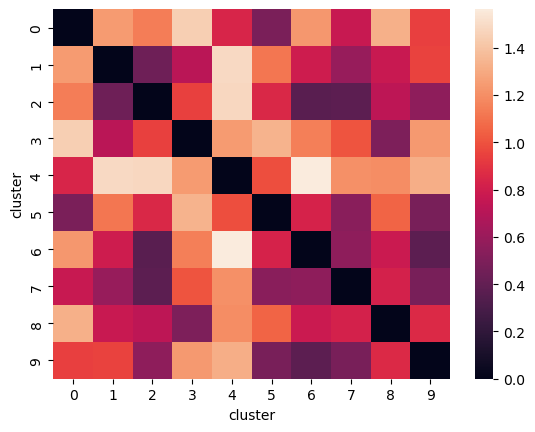

In [105]:
sns.heatmap(pca_tab_5000)

In [107]:
kmeans.cluster_centers_

array([[ 0.58513253, -0.60344633, -0.34301891],
       [-0.16051075,  0.39288891, -0.34649613],
       [-0.32168387,  0.05006148, -0.11934044],
       [ 0.28518675,  0.73617891,  0.09736648],
       [ 1.11992056, -0.18062173,  0.14673227],
       [ 0.23374085, -0.59025286, -0.00829112],
       [-0.44302699, -0.14442664,  0.15906862],
       [-0.02890964, -0.16494469, -0.21864352],
       [ 0.08872638,  0.37817813,  0.38610513],
       [-0.17650121, -0.40634026,  0.16467056]])

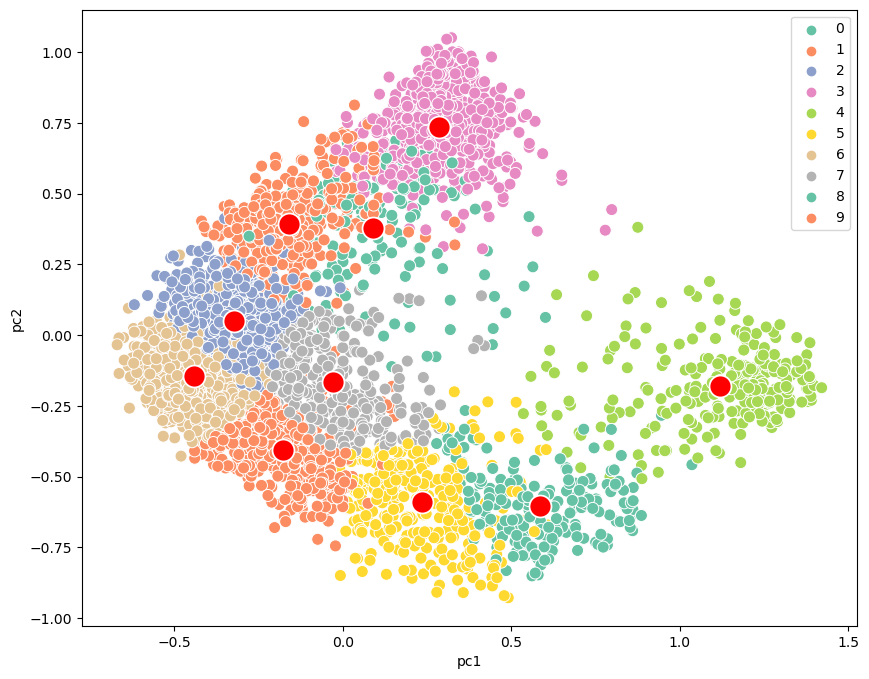

In [108]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['pc1','pc2','pc3']
cl_pos

fig, ax = plt.subplots(figsize=(10, 8))

plot_data = pd.DataFrame(tab1)
plot_data.columns = ['pc1','pc2','pc3']
plot_data['cluster'] = kmeans.labels_

sns.scatterplot(data=plot_data, x='pc1', y='pc2', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='pc1', y='pc2', color='red', s=250)
plt.show()

In [121]:
plot_data.groupby('cluster')

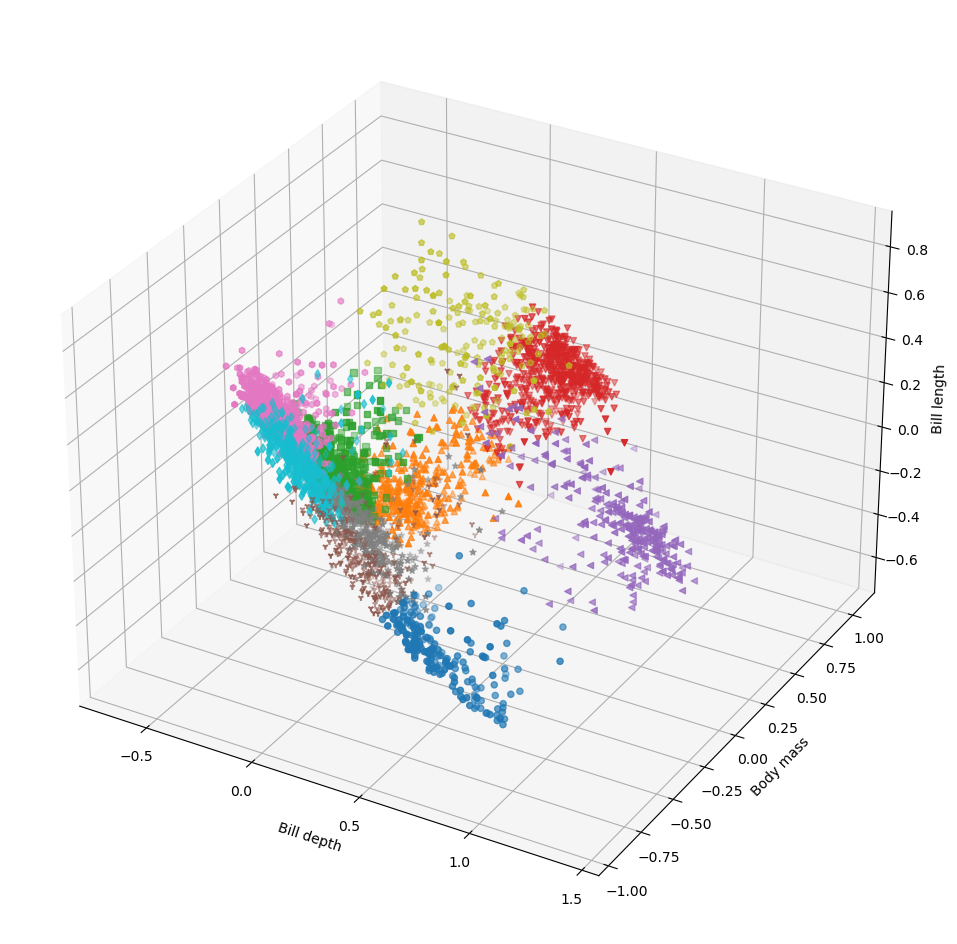

In [126]:
import matplotlib.pyplot as plt
import random
colors = ['r','g','b','m','c','y','k','w']
markers = ['o', '^','s',"v","<","1","h","*","p","d"]
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# ax.scatter(plot_data['bill_depth_mm'], plot_data['bill_length_mm'], plot_data['flipper_length_mm'])
for marker, d in plot_data.groupby('cluster'):
    ax.scatter(d['pc1'], d['pc2'], d['pc3'], marker=markers[marker], label=d['cluster'])

ax.set_xlabel('Bill depth')
ax.set_ylabel('Body mass')
ax.set_zlabel('Bill length')
plt.show()

ValueError: Length mismatch: Expected axis has 4 elements, new values have 9 elements

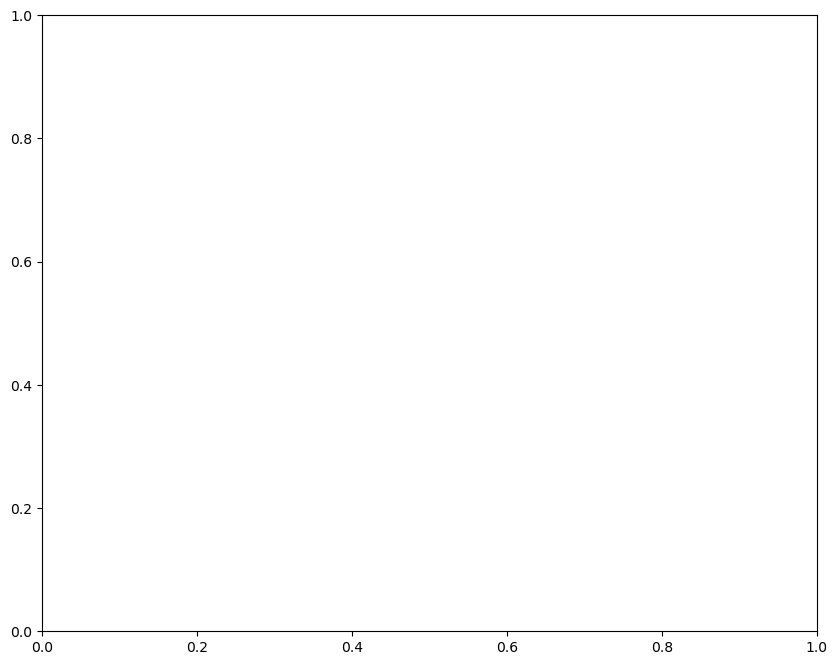

In [128]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['pc1','pc2','pc3']
cl_pos

fig, ax = plt.subplots(figsize=(10, 8))

plot_data_all = pd.DataFrame(clean_norm5000)
plot_data.columns = ['danceability',	'energy',	'loudness',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence'	,'tempo']
plot_data['cluster'] = kmeans.labels_

sns.scatterplot(data=plot_data, x='danceability', y='energy', hue='cluster', palette='Set2', s=75)

plt.show()

In [62]:
from sklearn.cluster import KMeans

def inertia(table): #calculation inertia
    inertia_list = []

    for i in range(1,20):
        myKMeans = KMeans(n_clusters=i)
        myKMeans.fit(table)
        inertia_list.append(round(myKMeans.inertia_))
    return inertia_list
    

In [63]:
rel_iner = inertia(relativness)

In [71]:
def graph(inerdef):  #preparing graph based on inertia
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.title(f'Inertia evolution from 1 to 20 clusters')
    sns.lineplot(x=range(1, 20), y=inerdef, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

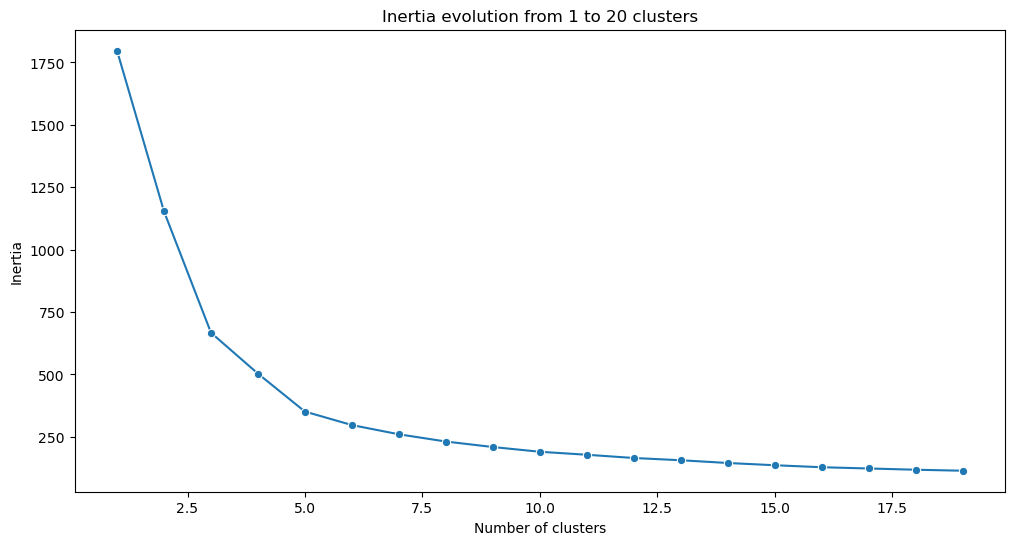

In [72]:
graph(inertia(tab1))

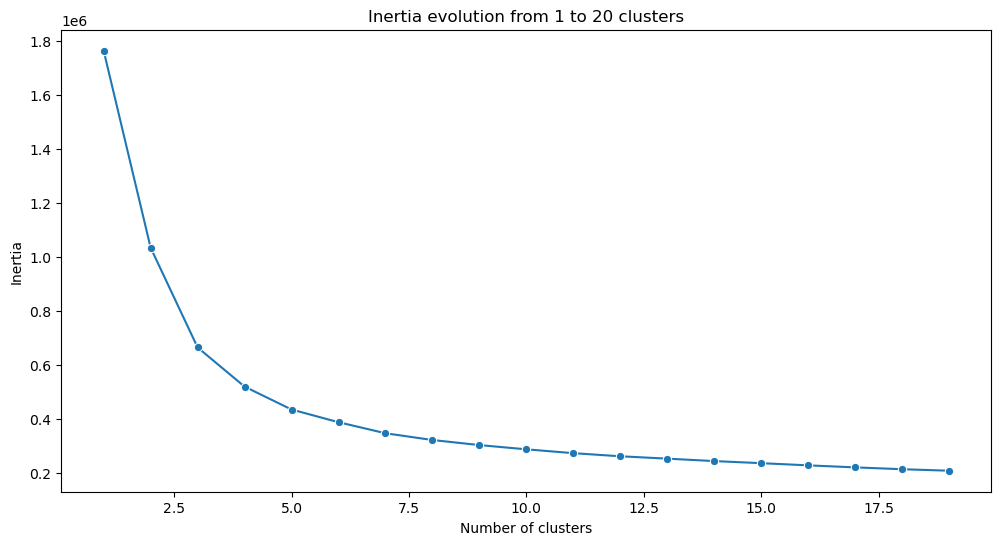

In [73]:
graph(inertia(relativness))

In [85]:
from sklearn.metrics import silhouette_score
silhouette_score(tab12, kmeans.labels_)

0.814102679956396

tab12

In [96]:
tab12

,0,1,2,cluster
ar_id,,,,
Saudade De Bahia Antônio Carlos Jobim 5QGM1U0eCYrQuwSJwTm5Zq,-0.109514,-0.442896,0.120053,7
Mulher Eu Sei Chico César 3mXqOdlLE1k67WsAxryPFs,0.485194,-0.831943,-0.140807,1
Rosa Morena Kurt Elling 7bSzjzjTkWT2CkIPPdp0eA,0.579971,-0.847319,-0.143722,1
Desafinado Stan Getz 5pstSsK0G4q86gdyy1Spqh,0.654003,-0.657800,-0.098767,1
Madalena Maria Gasolina 33u3dO0JWjerYpFN61J3ug,0.608631,-0.670979,0.290864,3
...,...,...,...,...
Sinfonia: III. In ruhig fliessender Bewegung Luciano Berio 0lMDzAcO0RPdj30zcqUEU9,0.745891,-0.398387,-0.434204,1
"Elgar: Enigma Variations, Op. 36: XV. EDU (Finale) Edward Elgar 2T1bhzjTfir3gsLRiudU1e",1.247990,-0.070327,0.057417,5
"Also sprach Zarathustra, Op.30, TrV 176: Prelude (Sonnenaufgang) Richard Strauss 3SOZcwfezNCWKs2vukSELD",1.088487,0.189873,-0.017009,5


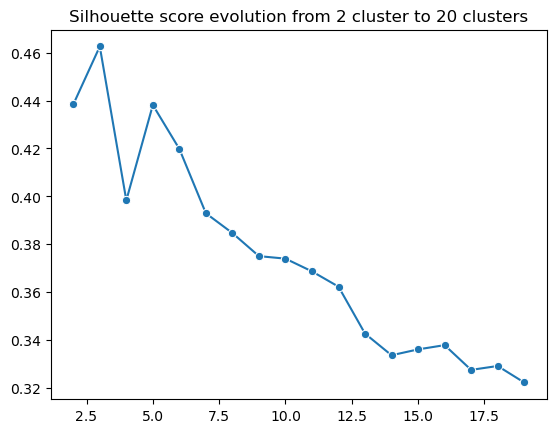

In [100]:
max_k = 20
sil_score = []


for k in range(2, max_k): 
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit(tab12).labels_
    sil_score.append(silhouette_score(tab12, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.show()

In [ ]:


# Define a function to calculate k-means clustering and return silhouette score for different k values
def get_silhouette_score(k, clean_norm5000):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(clean_norm5000)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)
    return score

# Calculate silhouette scores for different k values
k_values = list(range(2, 11))
silhouette_scores = [get_silhouette_score(k, scaled_features) for k in k_values]

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Penguins Dataset")
plt.show()


def plot_silhouette_scores(k, features):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)

    # Compute silhouette scores for each sample
    sample_scores = silhouette_samples(features, labels)

    fig, ax = plt.subplots()
    y_lower = 10
    cmap = get_cmap("viridis")

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to the same cluster and sort them
        ith_cluster_silhouette_values = sample_scores[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax.set_title("Silhouette Scores for Penguins Dataset with k = {}".format(k))
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    # The vertical line for the average silhouette score of all the values
    ax.axvline(x=score, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the y-axis labels
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# Visualize the silhouette scores for different k values
for k in range(2, 11):
    plot_silhouette_scores(k, scaled_features)